# Petousis dataset analysis - Enze

*Authors: Enze Chen, Mark Asta (University of California, Berkeley)*

In [1]:
import json
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
%matplotlib inline

## Helper functions

In [2]:
def space_group_to_crystal_system(space_group_number):
    if space_group_number <= 2:
        return 'triclinic'
    elif space_group_number <= 15:
        return 'monoclinic'
    elif space_group_number <= 74:
        return 'orthorhombic'
    elif space_group_number <= 142:
        return 'tetragonal'
    elif space_group_number <= 167:
        return 'trigonal'
    elif space_group_number <= 194:
        return 'hexagonal'
    else:
        return 'cubic'

In [3]:
with open('../../data/dielectric_tensors_and_refractive_indices.json', 'r') as f:
    data = json.load(f)

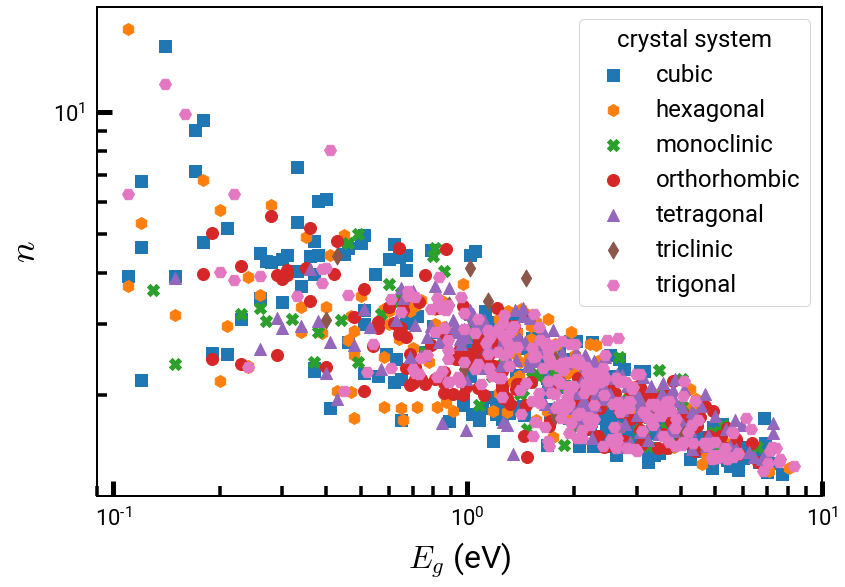

In [8]:
n = []
Eg = []
system = []

for m in data:
    n.append(m['n'])
    Eg.append(m['band_gap'])
    system.append(space_group_to_crystal_system(m['meta']['space_group']))
df = pd.DataFrame({'n':n, 'Eg':Eg, 'system':system})

symbols = ['s', 'h', 'X', 'o', '^', 'd', 'H']
groups = df.groupby('system', sort=True)

plt.rcParams.update({'figure.figsize':(13,9), 'lines.markersize':12})
fig, ax = plt.subplots()

for i, (name, group) in enumerate(groups):
    ax.scatter(group.Eg, group.n, marker=symbols[i], label=name)
ax.set_yscale('log')
ax.set_ylabel('$n$', fontsize=36)
ax.set_xscale('log')
ax.set_xlim(0.09, 10)
ax.set_xlabel('$E_g$ (eV)', fontsize=32)
ax.tick_params(which='major', length=15, width=5, pad=11)
ax.tick_params(which='minor', length=10, width=3.5)
ax.legend(title='crystal system', fontsize=24, title_fontsize=24)
plt.show()
fig.savefig('../preamble/petousis_n_Eg.png', dpi=600)